Now we move on to the **Hospital Records System** section.

We start with the CPTEVENTS table. 
CPT stands for Current Procedural Events.

Let's import the libraries that we'll need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [4]:
cptevents_df = pd.read_csv('..\Extracted CSVs\CPTEVENTS.csv')

Getting a feel of the data.

In [5]:
cptevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
0,317,11743,129545,ICU,NaN,99232,99232.0,NaN,6.0,Evaluation and management,Hospital inpatient services,NaN
1,318,11743,129545,ICU,NaN,99232,99232.0,NaN,7.0,Evaluation and management,Hospital inpatient services,NaN
2,319,11743,129545,ICU,NaN,99232,99232.0,NaN,8.0,Evaluation and management,Hospital inpatient services,NaN
3,320,11743,129545,ICU,NaN,99232,99232.0,NaN,9.0,Evaluation and management,Hospital inpatient services,NaN
4,321,6185,183725,ICU,NaN,99223,99223.0,NaN,1.0,Evaluation and management,Hospital inpatient services,NaN


In [6]:
cptevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573146 entries, 0 to 573145
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ROW_ID            573146 non-null  int64  
 1   SUBJECT_ID        573146 non-null  int64  
 2   HADM_ID           573146 non-null  int64  
 3   COSTCENTER        573146 non-null  object 
 4   CHARTDATE         101545 non-null  object 
 5   CPT_CD            573146 non-null  object 
 6   CPT_NUMBER        573128 non-null  float64
 7   CPT_SUFFIX        22 non-null      object 
 8   TICKET_ID_SEQ     471601 non-null  float64
 9   SECTIONHEADER     573125 non-null  object 
 10  SUBSECTIONHEADER  573125 non-null  object 
 11  DESCRIPTION       101545 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 52.5+ MB


In [7]:
cptevents_df['COSTCENTER'].value_counts()

ICU     471601
Resp    101545
Name: COSTCENTER, dtype: int64

COSTCENTER is the cost center which billed for the corresponding CPT codes. There are two possible cost centers: ‘ICU’ and ‘Resp’. ‘Resp’ codes correspond to mechanical or non-invasive ventilation and were billed by the respiratory therapist. ‘ICU’ codes correspond to the procedures billed for by the ICU.



In [8]:
cptevents_df['SECTIONHEADER'].value_counts()

Evaluation and management    404388
Medicine                     114194
Surgery                       50807
Radiology                      2974
Anesthesia                      687
Pathology and laboratory         53
Emerging technology              22
Name: SECTIONHEADER, dtype: int64

The section headers provide a category for the given CPT code

<AxesSubplot:>

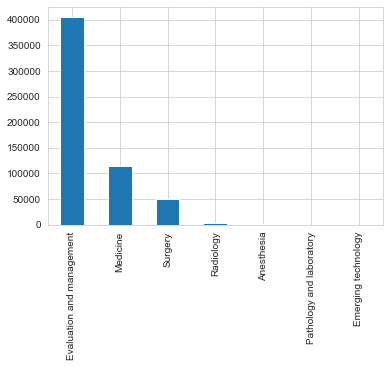

In [9]:
cptevents_df['SECTIONHEADER'].value_counts().plot(kind='bar')

In [10]:
cptevents_df['SUBSECTIONHEADER'].value_counts()

Hospital inpatient services                                                                                                                                                  268296
Critical care services                                                                                                                                                       106469
Pulmonary                                                                                                                                                                    101563
Consultations                                                                                                                                                                 25925
Cardiovascular system                                                                                                                                                         21485
Respiratory system                                                                                  

In [11]:
len(cptevents_df['SUBSECTIONHEADER'].value_counts())

54

There are 54 different subsections.

In [12]:
cptevents_df.groupby(['SECTIONHEADER', 'SUBSECTIONHEADER']).count()['ROW_ID'].head()


SECTIONHEADER              SUBSECTIONHEADER                  
Anesthesia                 Conscious sedation (deleted codes)     37
                           Moderate (conscious) sedation          79
                           Other procedures                      571
Emerging technology        Temporary codes                        22
Evaluation and management  Case management services              163
Name: ROW_ID, dtype: int64

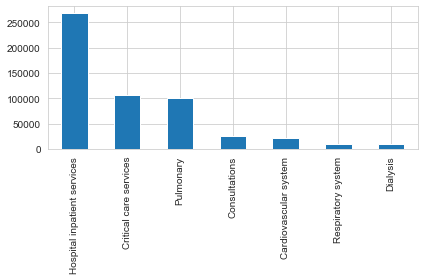

In [13]:
cptevents_df['SUBSECTIONHEADER'].value_counts().head(7).plot(kind='bar')
plt.tight_layout()
